In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("Analytics Assignment - for Ashwin - Leads.csv")

In [3]:
df.shape

(24939, 14)

In [4]:
df.head()

,SN,Date,Lead ID,Webinar Date,Time Zone,UTM Source,UTM Medium,UTM Campaign,Webinar Present,Sale,Sale Date,Lead Month,Channel Group,Dupliate
0,1,1-Jan-2020,2.373606e+10,"07:00pm - Thursday, January 9, 2020",America/Los_Angeles,quora,answers,post,NaN,NaN,NaN,2020 - Jan,quora,1
1,2,1-Jan-2020,9.076618e+10,"07:00pm - Tuesday, January 7, 2020",America/Los_Angeles,facebook,cpc,DEC_SPC__REG_ATTND_SALE_IMG_LA2_V3,NaN,NaN,NaN,2020 - Jan,facebook,1
2,3,1-Jan-2020,6.670074e+10,"07:00pm - Thursday, January 2, 2020",America/Chicago,quora,answers,post,NaN,NaN,NaN,2020 - Jan,quora,1
3,4,1-Jan-2020,9.900996e+10,"07:00pm - Thursday, January 2, 2020",America/Los_Angeles,NaN,NaN,NaN,1.0,NaN,NaN,2020 - Jan,Organic,1
4,5,1-Jan-2020,8.572440e+10,"07:30pm - Sunday, January 12, 2020",America/Los_Angeles,blind,publisher,Dec_2019,NaN,NaN,NaN,2020 - Jan,blind,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24939 entries, 0 to 24938
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SN               24939 non-null  int64  
 1   Date             24939 non-null  object 
 2   Lead ID          24939 non-null  float64
 3   Webinar Date     24939 non-null  object 
 4   Time Zone        24939 non-null  object 
 5   UTM Source       13776 non-null  object 
 6   UTM Medium       13777 non-null  object 
 7   UTM Campaign     13739 non-null  object 
 8   Webinar Present  12275 non-null  float64
 9   Sale             2114 non-null   float64
 10  Sale Date        2114 non-null   object 
 11  Lead Month       24939 non-null  object 
 12  Channel Group    24918 non-null  object 
 13  Dupliate         24939 non-null  int64  
dtypes: float64(3), int64(2), object(9)
memory usage: 2.7+ MB


In [6]:
df.isna().sum()

SN                     0
Date                   0
Lead ID                0
Webinar Date           0
Time Zone              0
UTM Source         11163
UTM Medium         11162
UTM Campaign       11200
Webinar Present    12664
Sale               22825
Sale Date          22825
Lead Month             0
Channel Group         21
Dupliate               0
dtype: int64

In [7]:
df.describe()

,SN,Lead ID,Webinar Present,Sale,Dupliate
count,24939.000000,2.493900e+04,12275.0,2114.0,24939.000000
mean,12470.000000,4.977263e+10,1.0,1.0,1.268776
std,7199.413518,2.884455e+10,0.0,0.0,1.348721
min,1.000000,4.831477e+06,1.0,1.0,1.000000
25%,6235.500000,2.462509e+10,1.0,1.0,1.000000
50%,12470.000000,4.980110e+10,1.0,1.0,1.000000
75%,18704.500000,7.480681e+10,1.0,1.0,1.000000
max,24939.000000,9.999915e+10,1.0,1.0,39.000000


## EDA

<b>1. Target 'Channel Group'</b>

In [8]:
df['Channel Group'].value_counts()

Organic               11183
Google Discovery       3279
quora                  2691
Google NB              1843
Google YouTube         1782
blind                  1347
Google Remarketing      958
Google Brand            911
LinkedIn                393
sendinblue              210
facebook                190
Reddit                   47
Google Display           47
reddit                   17
bing                     11
Crash Course              5
fm_email                  3
customerio                1
Name: Channel Group, dtype: int64

<b>2.Timezone</b>

In [9]:
df['City'] = df['Time Zone'].str.split("/", expand=True)[1]
df['City']

0        Los_Angeles
1        Los_Angeles
2            Chicago
3        Los_Angeles
4        Los_Angeles
            ...     
24934       New_York
24935       New_York
24936       New_York
24937    Los_Angeles
24938       New_York
Name: City, Length: 24939, dtype: object

In [10]:
df['Continent'] = df['Time Zone'].str.split("/", expand=True)[0]
df['Continent']

0        America
1        America
2        America
3        America
4        America
          ...   
24934    America
24935    America
24936    America
24937    America
24938    America
Name: Continent, Length: 24939, dtype: object

In [11]:
df.head()

,SN,Date,Lead ID,Webinar Date,Time Zone,UTM Source,UTM Medium,UTM Campaign,Webinar Present,Sale,Sale Date,Lead Month,Channel Group,Dupliate,City,Continent
0,1,1-Jan-2020,2.373606e+10,"07:00pm - Thursday, January 9, 2020",America/Los_Angeles,quora,answers,post,NaN,NaN,NaN,2020 - Jan,quora,1,Los_Angeles,America
1,2,1-Jan-2020,9.076618e+10,"07:00pm - Tuesday, January 7, 2020",America/Los_Angeles,facebook,cpc,DEC_SPC__REG_ATTND_SALE_IMG_LA2_V3,NaN,NaN,NaN,2020 - Jan,facebook,1,Los_Angeles,America
2,3,1-Jan-2020,6.670074e+10,"07:00pm - Thursday, January 2, 2020",America/Chicago,quora,answers,post,NaN,NaN,NaN,2020 - Jan,quora,1,Chicago,America
3,4,1-Jan-2020,9.900996e+10,"07:00pm - Thursday, January 2, 2020",America/Los_Angeles,NaN,NaN,NaN,1.0,NaN,NaN,2020 - Jan,Organic,1,Los_Angeles,America
4,5,1-Jan-2020,8.572440e+10,"07:30pm - Sunday, January 12, 2020",America/Los_Angeles,blind,publisher,Dec_2019,NaN,NaN,NaN,2020 - Jan,blind,1,Los_Angeles,America


In [12]:
df1 = df.drop(['SN','Time Zone','UTM Source', 'UTM Medium', 'UTM Campaign', 'Webinar Present', 'Sale', 'Sale Date'], axis=1)

In [13]:
df1.head()

,Date,Lead ID,Webinar Date,Lead Month,Channel Group,Dupliate,City,Continent
0,1-Jan-2020,2.373606e+10,"07:00pm - Thursday, January 9, 2020",2020 - Jan,quora,1,Los_Angeles,America
1,1-Jan-2020,9.076618e+10,"07:00pm - Tuesday, January 7, 2020",2020 - Jan,facebook,1,Los_Angeles,America
2,1-Jan-2020,6.670074e+10,"07:00pm - Thursday, January 2, 2020",2020 - Jan,quora,1,Chicago,America
3,1-Jan-2020,9.900996e+10,"07:00pm - Thursday, January 2, 2020",2020 - Jan,Organic,1,Los_Angeles,America
4,1-Jan-2020,8.572440e+10,"07:30pm - Sunday, January 12, 2020",2020 - Jan,blind,1,Los_Angeles,America


In [14]:
df1.isna().sum()

Date              0
Lead ID           0
Webinar Date      0
Lead Month        0
Channel Group    21
Dupliate          0
City             51
Continent         0
dtype: int64

In [15]:
df1.dropna(inplace=True)

In [18]:
df1.shape

(24867, 8)

In [19]:
df1.head()

,Date,Lead ID,Webinar Date,Lead Month,Channel Group,Dupliate,City,Continent
0,1-Jan-2020,2.373606e+10,"07:00pm - Thursday, January 9, 2020",2020 - Jan,quora,1,Los_Angeles,America
1,1-Jan-2020,9.076618e+10,"07:00pm - Tuesday, January 7, 2020",2020 - Jan,facebook,1,Los_Angeles,America
2,1-Jan-2020,6.670074e+10,"07:00pm - Thursday, January 2, 2020",2020 - Jan,quora,1,Chicago,America
3,1-Jan-2020,9.900996e+10,"07:00pm - Thursday, January 2, 2020",2020 - Jan,Organic,1,Los_Angeles,America
4,1-Jan-2020,8.572440e+10,"07:30pm - Sunday, January 12, 2020",2020 - Jan,blind,1,Los_Angeles,America


In [20]:
df1['City'].to_list()

['Los_Angeles',
 'Los_Angeles',
 'Chicago',
 'Los_Angeles',
 'Los_Angeles',
 'Los_Angeles',
 'New_York',
 'Los_Angeles',
 'Los_Angeles',
 'Los_Angeles',
 'Los_Angeles',
 'Los_Angeles',
 'New_York',
 'Los_Angeles',
 'Chicago',
 'Los_Angeles',
 'Kolkata',
 'Los_Angeles',
 'Los_Angeles',
 'Los_Angeles',
 'Los_Angeles',
 'New_York',
 'Los_Angeles',
 'New_York',
 'Los_Angeles',
 'Los_Angeles',
 'Kolkata',
 'Los_Angeles',
 'Chicago',
 'Los_Angeles',
 'Los_Angeles',
 'New_York',
 'Los_Angeles',
 'Los_Angeles',
 'Chicago',
 'Los_Angeles',
 'Kolkata',
 'Los_Angeles',
 'Los_Angeles',
 'Los_Angeles',
 'New_York',
 'New_York',
 'Los_Angeles',
 'New_York',
 'Sydney',
 'Chicago',
 'Chicago',
 'Chicago',
 'New_York',
 'Chicago',
 'Los_Angeles',
 'Los_Angeles',
 'Los_Angeles',
 'Chicago',
 'Los_Angeles',
 'Chicago',
 'Los_Angeles',
 'New_York',
 'New_York',
 'Los_Angeles',
 'Chicago',
 'Los_Angeles',
 'New_York',
 'Kolkata',
 'Los_Angeles',
 'Dhaka',
 'Los_Angeles',
 'Chicago',
 'Kolkata',
 'Los_Angel

In [21]:
df1['City']=df1['City'].str.replace('_'," ")

In [22]:
df1['City']

0        Los Angeles
1        Los Angeles
2            Chicago
3        Los Angeles
4        Los Angeles
            ...     
24934       New York
24935       New York
24936       New York
24937    Los Angeles
24938       New York
Name: City, Length: 24867, dtype: object

In [23]:
df1.head()

,Date,Lead ID,Webinar Date,Lead Month,Channel Group,Dupliate,City,Continent
0,1-Jan-2020,2.373606e+10,"07:00pm - Thursday, January 9, 2020",2020 - Jan,quora,1,Los Angeles,America
1,1-Jan-2020,9.076618e+10,"07:00pm - Tuesday, January 7, 2020",2020 - Jan,facebook,1,Los Angeles,America
2,1-Jan-2020,6.670074e+10,"07:00pm - Thursday, January 2, 2020",2020 - Jan,quora,1,Chicago,America
3,1-Jan-2020,9.900996e+10,"07:00pm - Thursday, January 2, 2020",2020 - Jan,Organic,1,Los Angeles,America
4,1-Jan-2020,8.572440e+10,"07:30pm - Sunday, January 12, 2020",2020 - Jan,blind,1,Los Angeles,America


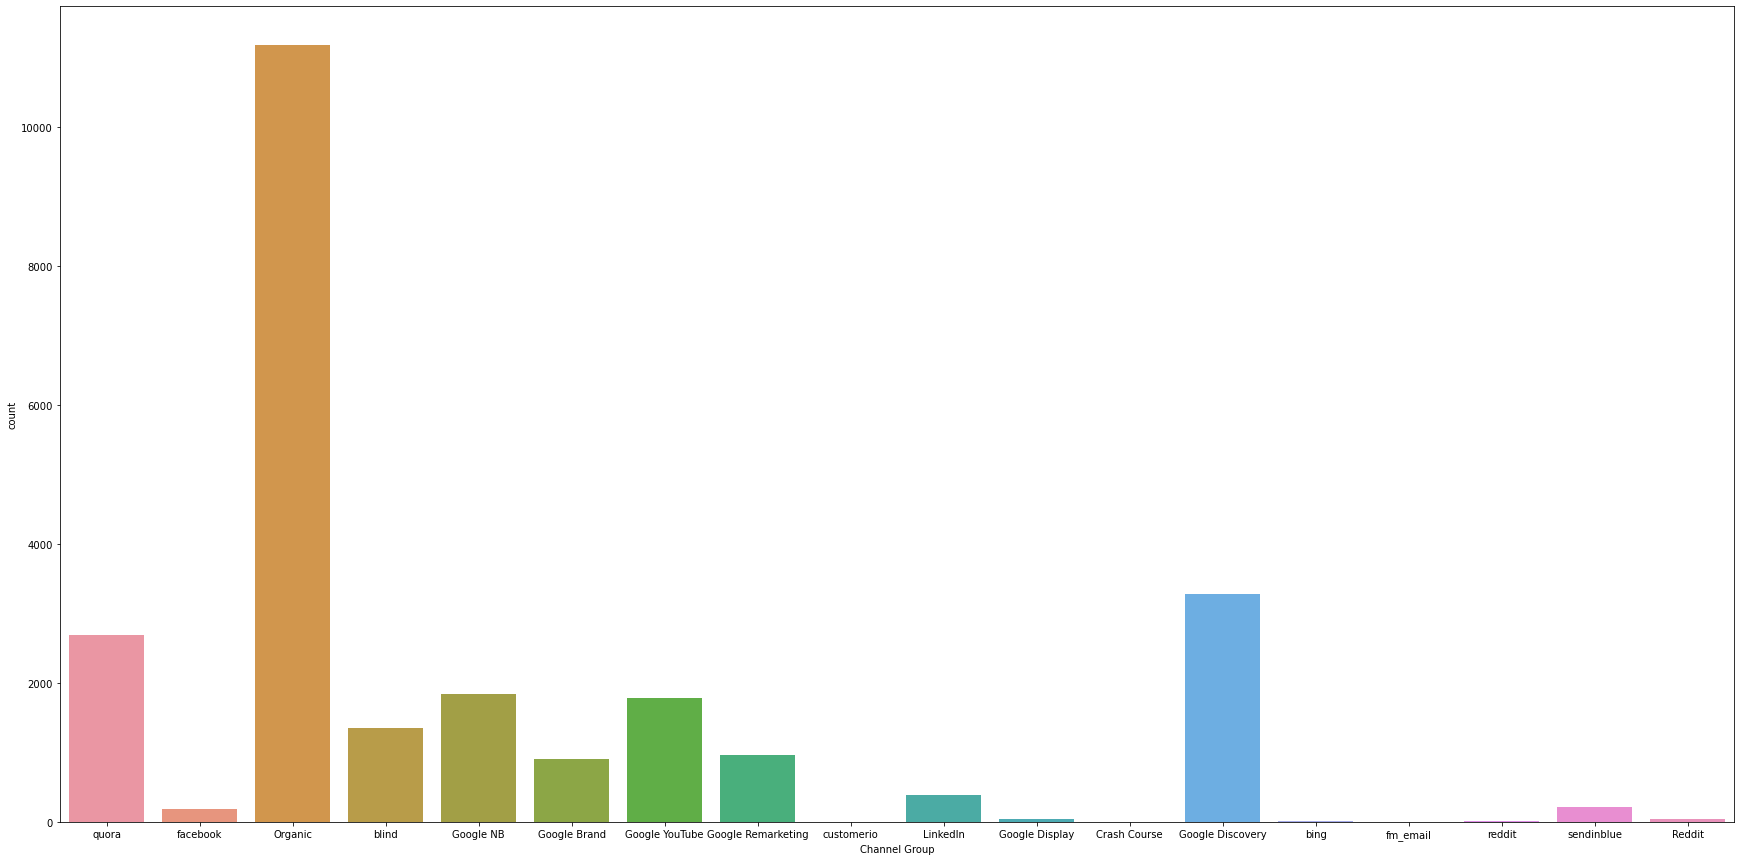

In [24]:
plt.figure(figsize=(30,15))
sns.countplot('Channel Group', data=df)

In [25]:
df1['Dupliate'].describe()

count    24867.000000
mean         1.268468
std          1.349157
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         39.000000
Name: Dupliate, dtype: float64

In [26]:
df1['Dupliate'].value_counts()

1     21010
2      2948
3       562
4       152
5        58
6        20
7        18
8        11
9        10
10        9
13        7
11        6
12        5
29        5
28        3
18        2
21        2
19        2
20        2
36        2
17        2
31        2
38        2
22        2
15        2
23        2
39        2
24        2
25        2
26        2
27        2
14        2
30        2
16        2
37        1
35        1
34        1
33        1
32        1
Name: Dupliate, dtype: int64

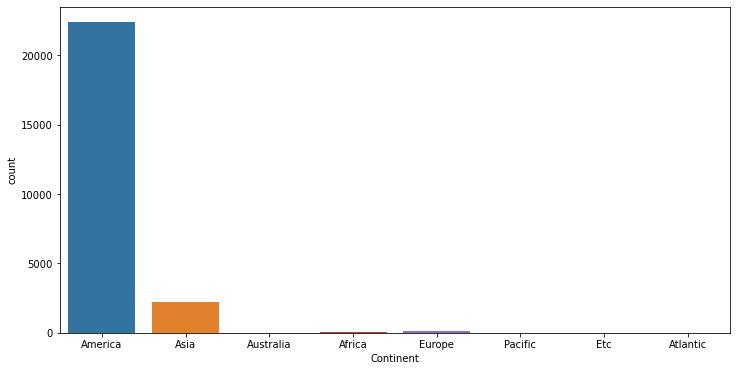

In [27]:
plt.figure(figsize=(12,6))
sns.countplot('Continent', data=df1)